In [19]:
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import plotly.express as px


In [4]:
# import geopandas and get the geoBoundaries-BGD-ADM2.shp file to visualize the map of bangladesh

geo_df = gpd.read_file('map/geoBoundaries-BGD-ADM2.shp')
geo_df.head()

,shapeName,shapeISO,shapeID,shapeGroup,shapeType,geometry
0,Bagerhat,None,16705992B20839200632344,BGD,ADM2,"MULTIPOLYGON (((89.84021 21.82784, 89.84052 21..."
1,Bandarban,None,16705992B11302512284440,BGD,ADM2,"POLYGON ((92.61391 21.85191, 92.61389 21.85186..."
2,Barguna,None,16705992B22239328109606,BGD,ADM2,"MULTIPOLYGON (((89.87968 22.07869, 89.87865 22..."
3,Barisal,None,16705992B48524436232680,BGD,ADM2,"MULTIPOLYGON (((90.55435 22.59264, 90.55435 22..."
4,Bhola,None,16705992B20840636248400,BGD,ADM2,"MULTIPOLYGON (((90.77172 21.85595, 90.76920 21..."


In [5]:
# plot the district names inside the map 
geo_df['coords'] = geo_df['geometry'].apply(lambda x: x.representative_point().coords[:])
geo_df['coords'] = [coords[0] for coords in geo_df['coords']]
geo_df.head()


,shapeName,shapeISO,shapeID,shapeGroup,shapeType,geometry,coords
0,Bagerhat,None,16705992B20839200632344,BGD,ADM2,"MULTIPOLYGON (((89.84021 21.82784, 89.84052 21...","(89.75429176407334, 22.523421011000067)"
1,Bandarban,None,16705992B11302512284440,BGD,ADM2,"POLYGON ((92.61391 21.85191, 92.61389 21.85186...","(92.38619729828679, 21.77005344750006)"
2,Barguna,None,16705992B22239328109606,BGD,ADM2,"MULTIPOLYGON (((89.87968 22.07869, 89.87865 22...","(90.20372690701797, 22.172934357500026)"
3,Barisal,None,16705992B48524436232680,BGD,ADM2,"MULTIPOLYGON (((90.55435 22.59264, 90.55435 22...","(90.3251569997336, 22.761486941000044)"
4,Bhola,None,16705992B20840636248400,BGD,ADM2,"MULTIPOLYGON (((90.77172 21.85595, 90.76920 21...","(90.76798344375277, 22.400836482000045)"


In [6]:
# plot the district names inside the map
# fig,ax = plt.subplots(figsize=(20,20))
# ax = geo_df.plot(ax=ax)
# for x, y, label in zip(geo_df.geometry.centroid.x, geo_df.geometry.centroid.y, geo_df['shapeName']):
#     ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points",fontsize=10)
# plt.show()

In [7]:
# import the riceprice data csv
df = pd.read_csv('riceprice.csv')
df.head()

,division,district,upazila,bazar,merchandise,price_type,year,lowest_price,maximum_price,price
0,Khulna,Satkhira,Satkhira Sadar,Satkhira Sadar,Aman,Retail,2010,4.0,5.0,4.50
1,Dhaka,Rajbari,Rajbari Sadar,Rajbari Sadar,Aman,Retail,2010,5.0,5.0,5.00
2,Dhaka,Kishoreganj,Kishoreganj Sadar,Kishoreganj Sadar,Aman,Retail,2010,5.0,6.0,5.50
3,Dhaka,Netrokona,Netrokona Sadar,Netrokona Sadar,Aman,Retail,2010,10.0,12.0,11.00
4,Dhaka,Netrokona,Netrokona Sadar,Netrokona Sadar,Aman,Retail,2010,12.0,12.5,12.25


<Figure size 6000x3000 with 0 Axes>

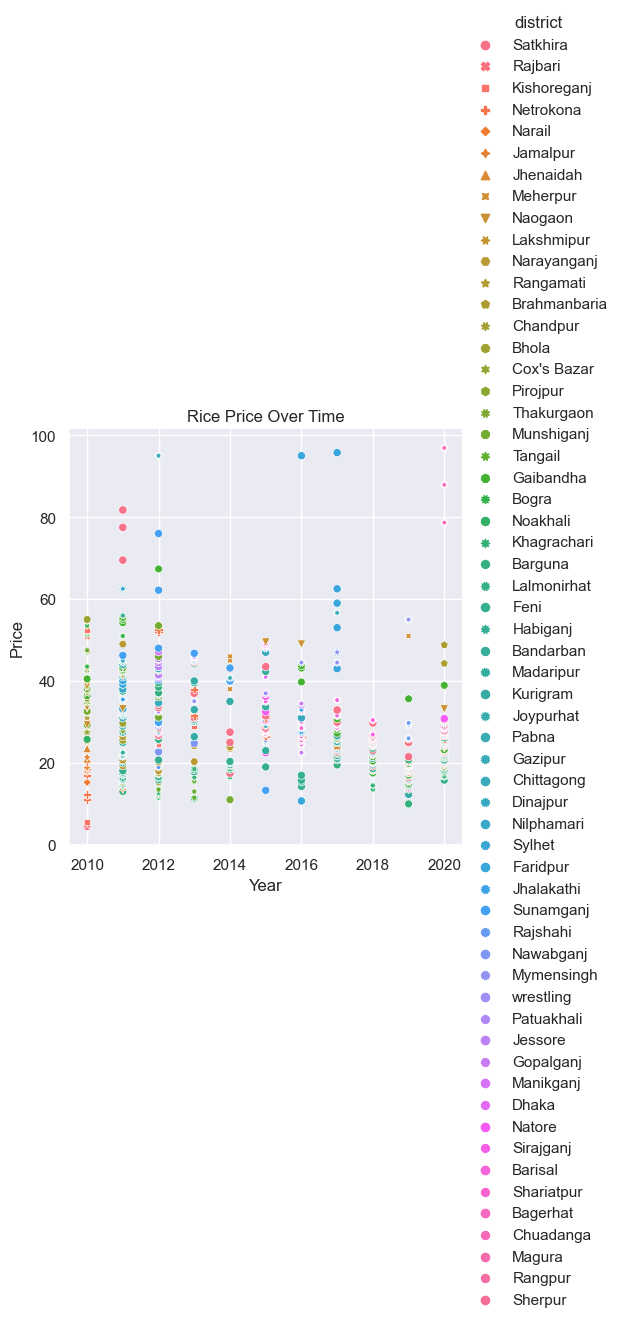

In [8]:
# make a heat map showing the rice price for each district over time, with the color intensity indicating the price level and the x-axis indicating the time

# full figure is not showing in pdf
plt.figure(figsize=(60,30))
sns.set(style="darkgrid")

sns.relplot(x="year", y="price", hue="district", style="district", data=df, legend=1, kind='scatter')
plt.title('Rice Price Over Time')
plt.xlabel('Year')
plt.ylabel('Price')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., prop={'size': 8}, ncol=2)
plt.savefig('images/map/ricepriceot.pdf', bbox_inches='tight')
plt.show()


<Figure size 3000x3000 with 0 Axes>

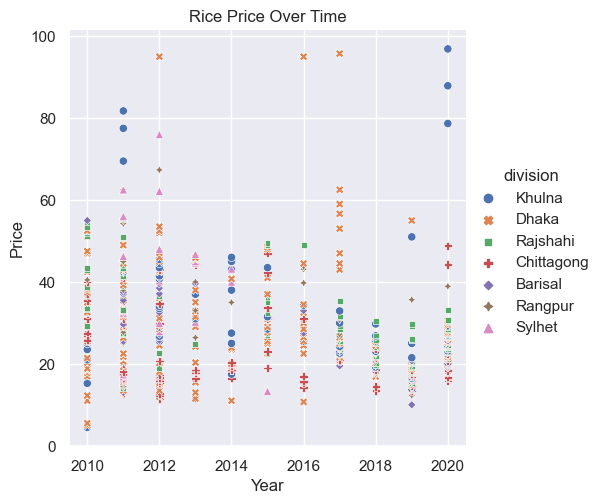

In [9]:
# make a heat map showing the rice price for each district over time, with the color intensity indicating the price level and the x-axis indicating the time

plt.figure(figsize=(30,30))
sns.set(style="darkgrid")

sns.relplot(x="year", y="price", hue="division", style="division", data=df)
plt.title('Rice Price Over Time')
plt.xlabel('Year')
plt.ylabel('Price')

plt.savefig('images/map/ricepriceot_div.pdf', bbox_inches='tight')
plt.show()




C:\Users\errhy\AppData\Local\Temp\ipykernel_25936\1456619580.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(geo_df.geometry.centroid.x, geo_df.geometry.centroid.y, geo_df['shapeName']):
C:\Users\errhy\AppData\Local\Temp\ipykernel_25936\1456619580.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(geo_df.geometry.centroid.x, geo_df.geometry.centroid.y, geo_df['shapeName']):


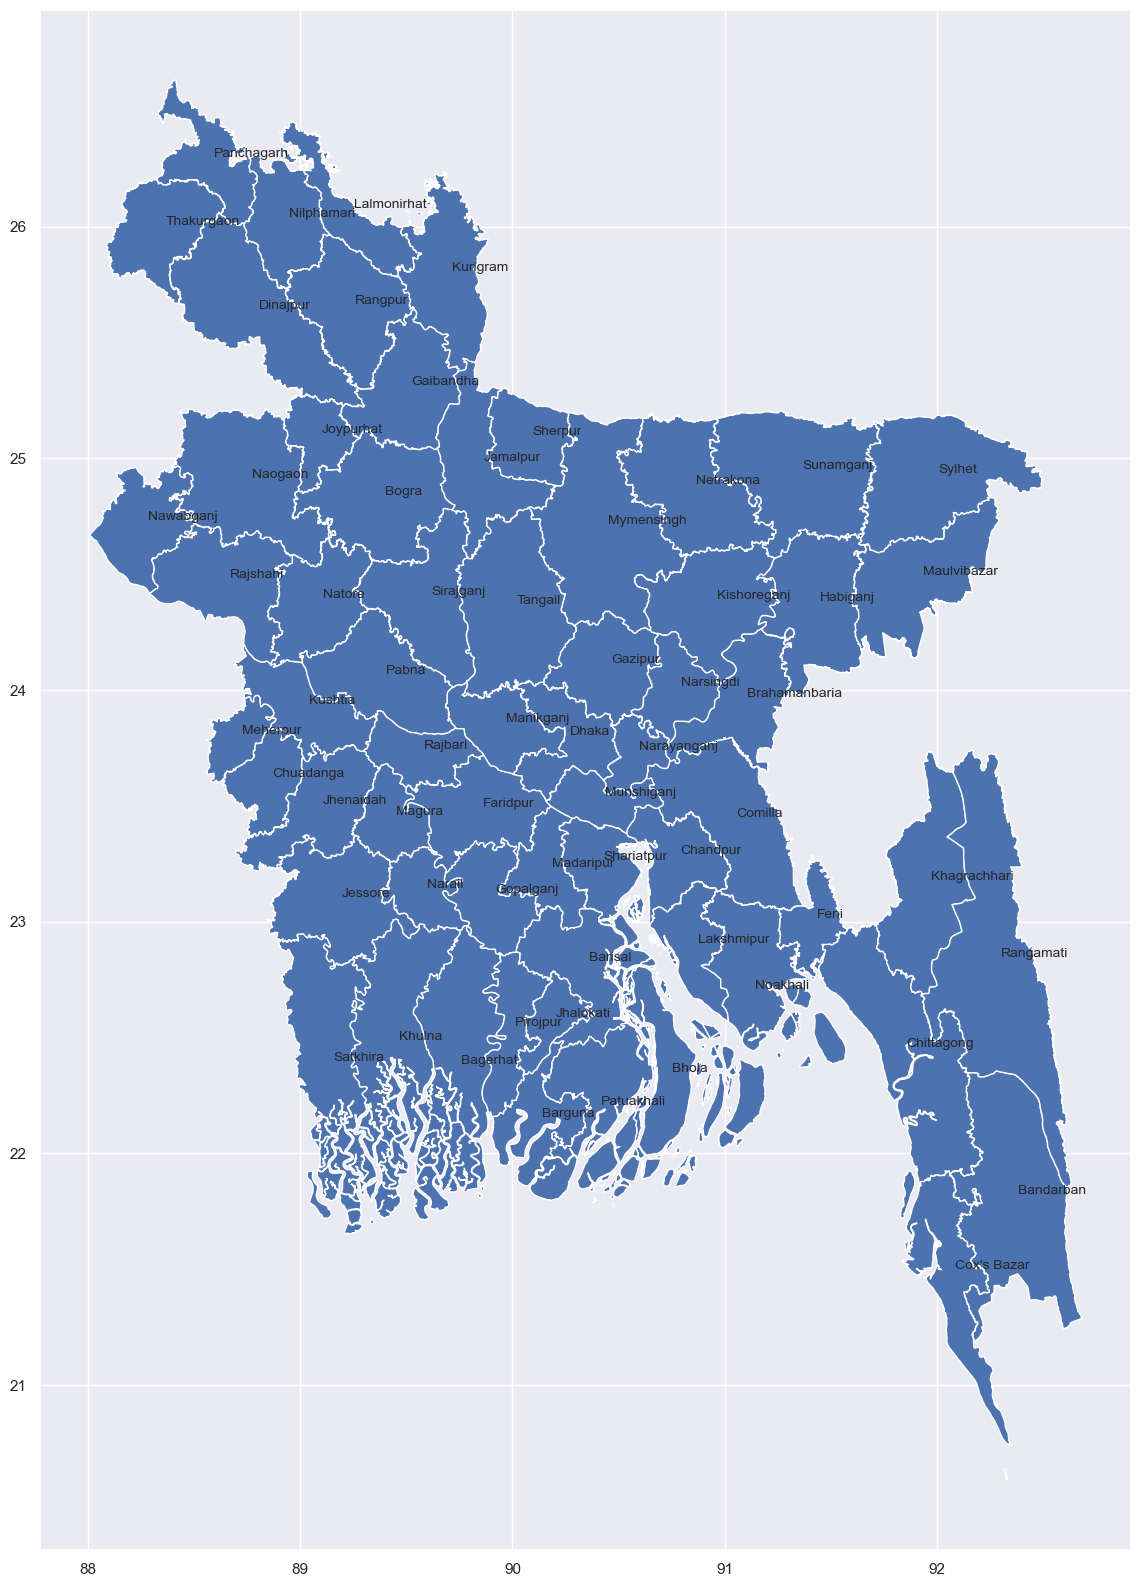

In [10]:
# make a chloropleth map showing the average rice price for each district in bangladesh

fig,ax = plt.subplots(figsize=(20,20))
ax = geo_df.plot(ax=ax)
for x, y, label in zip(geo_df.geometry.centroid.x, geo_df.geometry.centroid.y, geo_df['shapeName']):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points",fontsize=10)
plt.show()


In [11]:
# show the average rice price and make it cloropleth 

# merge the two dataframes if the district of geo_df shapename is not found in df for that year, make the average price 0
geo_df = geo_df.merge(df, left_on='shapeName', right_on='district', how='left')

geo_df

,shapeName,shapeISO,shapeID,shapeGroup,shapeType,geometry,coords,division,district,upazila,bazar,merchandise,price_type,year,lowest_price,maximum_price,price
0,Bagerhat,None,16705992B20839200632344,BGD,ADM2,"MULTIPOLYGON (((89.84021 21.82784, 89.84052 21...","(89.75429176407334, 22.523421011000067)",Khulna,Bagerhat,Bagerhat Sadar,Bagerhat Sadar,Boro,Retail,2019.0,13.53,14.37,13.95
1,Bagerhat,None,16705992B20839200632344,BGD,ADM2,"MULTIPOLYGON (((89.84021 21.82784, 89.84052 21...","(89.75429176407334, 22.523421011000067)",Khulna,Bagerhat,Bagerhat Sadar,Bagerhat Sadar,Boro,Retail,2019.0,16.55,17.12,16.83
2,Bandarban,None,16705992B11302512284440,BGD,ADM2,"POLYGON ((92.61391 21.85191, 92.61389 21.85186...","(92.38619729828679, 21.77005344750006)",Chittagong,Bandarban,Bandarban Sadar,Bandarban Sadar,Aman,Retail,2011.0,19.50,20.50,20.00
3,Bandarban,None,16705992B11302512284440,BGD,ADM2,"POLYGON ((92.61391 21.85191, 92.61389 21.85186...","(92.38619729828679, 21.77005344750006)",Chittagong,Bandarban,Bandarban Sadar,Bandarban Sadar,Aman,Retail,2011.0,29.00,30.00,29.50
4,Bandarban,None,16705992B11302512284440,BGD,ADM2,"POLYGON ((92.61391 21.85191, 92.61389 21.85186...","(92.38619729828679, 21.77005344750006)",Chittagong,Bandarban,Bandarban Sadar,Bandarban Sadar,Aman,Retail,2013.0,43.49,44.86,44.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,Tangail,None,16705992B95532052767873,BGD,ADM2,"POLYGON ((90.14755 24.03354, 90.14726 24.03351...","(90.00163283476385, 24.375756978000055)",Dhaka,Tangail,Tangail Sadar Bazar,Tangail Sadar Bazar,Boro,Retail,2020.0,23.63,24.63,24.13
563,Thakurgaon,None,16705992B71150444333759,BGD,ADM2,"POLYGON ((88.62676 26.05593, 88.62649 26.05594...","(88.31074812085605, 25.936234042000052)",Rangpur,Thakurgaon,Thakurgaon Sadar,Thakurgaon Sadar,Boro,Retail,2010.0,28.00,30.00,29.00
564,Thakurgaon,None,16705992B71150444333759,BGD,ADM2,"POLYGON ((88.62676 26.05593, 88.62649 26.05594...","(88.31074812085605, 25.936234042000052)",Rangpur,Thakurgaon,Thakurgaon Sadar,Thakurgaon Sadar,Aman,Retail,2011.0,14.00,16.00,15.00
565,Thakurgaon,None,16705992B71150444333759,BGD,ADM2,"POLYGON ((88.62676 26.05593, 88.62649 26.05594...","(88.31074812085605, 25.936234042000052)",Rangpur,Thakurgaon,Thakurgaon Sadar,Thakurgaon Sadar,Aman,Retail,2011.0,26.00,29.50,27.75


In [12]:
# division, district, upazila, bazar, merchandise, price_type is still NAN they are string type
geo_df['division'] = geo_df['division'].fillna('NA')
# set the shapename as district for the NAN values
geo_df['district'] = geo_df['district'].fillna(geo_df['shapeName'])
# set the Shapename+Sadar as upazila for the NAN values
geo_df['upazila'] = geo_df['upazila'].fillna(geo_df['shapeName']+' Sadar')
# set the Shapename+Sadar as bazar for the NAN values
geo_df['bazar'] = geo_df['bazar'].fillna(geo_df['shapeName']+' Sadar')
# set the any random value from Aus, Aman, Boro as merchandise for the NAN values
geo_df['merchandise'] = geo_df['merchandise'].fillna('Aman')
# set Retail price_type for the NAN values
geo_df['price_type'] = geo_df['price_type'].fillna('Retail')

# set lowest_price, maximum_price, price as mean from other rows for NAN values
geo_df['lowest_price'] = geo_df['lowest_price'].fillna(geo_df['lowest_price'].mean())
geo_df['maximum_price'] = geo_df['maximum_price'].fillna(geo_df['maximum_price'].mean())
geo_df['price'] = geo_df['price'].fillna(geo_df['price'].mean())

C:\Users\errhy\AppData\Local\Temp\ipykernel_25936\1832473663.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(geo_df.geometry.centroid.x, geo_df.geometry.centroid.y, geo_df['shapeName']):
C:\Users\errhy\AppData\Local\Temp\ipykernel_25936\1832473663.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(geo_df.geometry.centroid.x, geo_df.geometry.centroid.y, geo_df['shapeName']):


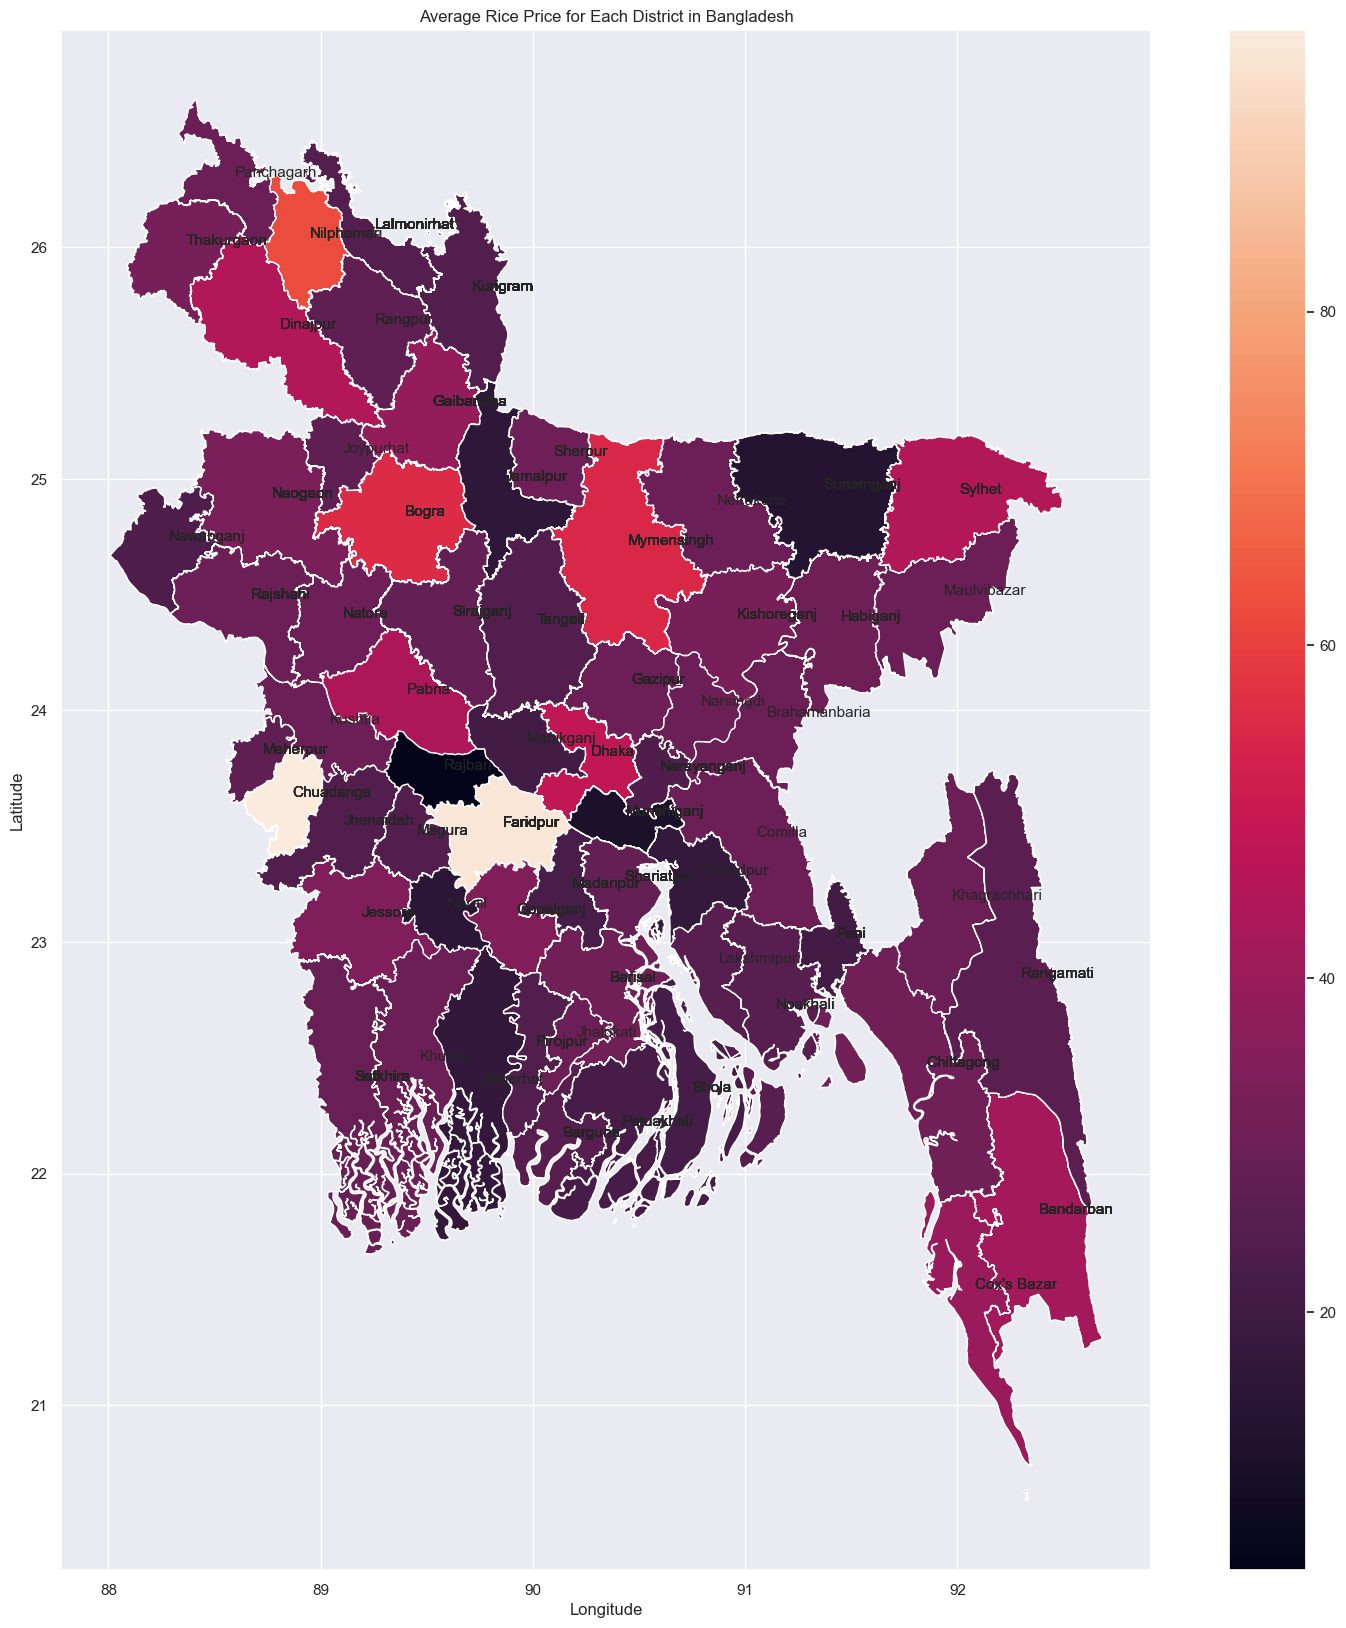

In [13]:
# plot the average rice price for each district in bangladesh
fig,ax = plt.subplots(figsize=(20,20))
ax = geo_df.plot(ax=ax, column='price', legend=True)

for x, y, label in zip(geo_df.geometry.centroid.x, geo_df.geometry.centroid.y, geo_df['shapeName']):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=11)

plt.title('Average Rice Price for Each District in Bangladesh')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig('images/map/avg_rice_price.pdf', bbox_inches='tight')
plt.show()


In [30]:
# on the bangladesh map, plot a heatmap with third dimension showing price as z-axis

# use plotly to plot the map with geopandas geo_df.geometry.centroid.x, geo_df.geometry.centroid.y, geo_df['shapeName']):

fig = px.density_mapbox(geo_df,
                        z='price',
                        lat=geo_df.geometry.centroid.y,
                        lon=geo_df.geometry.centroid.x,
                        hover_name=geo_df['shapeName'],
                        radius=20,
                        center=dict(lat=23.6850, lon=90.3563),
                        zoom=5,
                        mapbox_style="carto-positron",
                        title="Average Rice Price for Each District in Bangladesh",
                        width=1000,
                        height=1000
                        )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()
fig.write_html("BD.html")

C:\Users\errhy\AppData\Local\Temp\ipykernel_25936\4033226578.py:7: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


C:\Users\errhy\AppData\Local\Temp\ipykernel_25936\4033226578.py:8: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




In [18]:
# make a 3d map showing the rice price for each district in bangladesh in each year
fig = px.scatter_3d(df, x='year', y='district', z='price', color='price', size='price', size_max=18, opacity=0.7)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

fig.write_html('rice_price_3d.html')

